In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.model_selection import GridSearchCV


In [2]:
#new features are generated 

train_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_train.csv')
predict_data = pd.read_csv('E:/ML_IP/ML_projects/datastorm/credit_card_default_test.csv')

#new engineered features
train_data['PAY_JULY_GREAT2']=train_data['PAY_JULY']>1.5 #APPLY ONE-HOT
train_data['PAY_AUG_GREAT1']=train_data['PAY_AUG']>1 #APPLY ONE-HOT
train_data['PAY_SEP_GREAT1']=train_data['PAY_SEP']>1 #APPLY ONE-HOT
train_data['PAY_OCT_GREAT1']=train_data['PAY_OCT']>1 #APPLY ONE-HOT
train_data['PAY_NOV_GREAT1']=train_data['PAY_NOV']>1 #APPLY ONE-HOT
train_data['PAY_DEC_GREAT1']=train_data['PAY_DEC']>1 #APPLY ONE-HOT
train_data['TOT']=train_data['PAY_JULY']+train_data['PAY_AUG']+train_data['PAY_SEP']+train_data['PAY_OCT']+train_data['PAY_NOV']+train_data['PAY_DEC']


predict_data['PAY_JULY_GREAT2']=predict_data['PAY_JULY']>1.5 #APPLY ONE-HOT
predict_data['PAY_AUG_GREAT1']=predict_data['PAY_AUG']>1 #APPLY ONE-HOT
predict_data['PAY_SEP_GREAT1']=predict_data['PAY_SEP']>1 #APPLY ONE-HOT
predict_data['PAY_OCT_GREAT1']=predict_data['PAY_OCT']>1 #APPLY ONE-HOT
predict_data['PAY_NOV_GREAT1']=predict_data['PAY_NOV']>1 #APPLY ONE-HOT
predict_data['PAY_DEC_GREAT1']=predict_data['PAY_DEC']>1 #APPLY ONE-HOT
predict_data['TOT']=predict_data['PAY_JULY']+predict_data['PAY_AUG']+predict_data['PAY_SEP']+predict_data['PAY_OCT']+predict_data['PAY_NOV']+predict_data['PAY_DEC']


cat_cols=['Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY_GREAT2',
       'PAY_AUG_GREAT1', 'PAY_SEP_GREAT1', 'PAY_OCT_GREAT1', 'PAY_NOV_GREAT1',
       'PAY_DEC_GREAT1']
train_data = pd.get_dummies( train_data,columns = cat_cols )
predict_data = pd.get_dummies( predict_data,columns = cat_cols )



In [3]:
t1=train_data.drop(['Client_ID', 'Balance_Limit_V1', 'PAY_AUG', 'PAY_SEP',
       'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 
         'Gender_F',
       'Gender_M', 'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'PAY_SEP_GREAT1_False',
       'PAY_SEP_GREAT1_True', 'PAY_OCT_GREAT1_False', 'PAY_OCT_GREAT1_True',
       'PAY_NOV_GREAT1_False', 'PAY_NOV_GREAT1_True', 'PAY_DEC_GREAT1_False',
       'PAY_DEC_GREAT1_True'],axis=1)


t2=predict_data.drop(['Client_ID', 'Balance_Limit_V1', 'PAY_AUG', 'PAY_SEP',
       'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 
         'Gender_F',
       'Gender_M', 'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'PAY_SEP_GREAT1_False',
       'PAY_SEP_GREAT1_True', 'PAY_OCT_GREAT1_False', 'PAY_OCT_GREAT1_True',
       'PAY_NOV_GREAT1_False', 'PAY_NOV_GREAT1_True', 'PAY_DEC_GREAT1_False',
       'PAY_DEC_GREAT1_True'],axis=1)

In [4]:
X_train_ud, X, y_train_ud, y = train_test_split(t1.drop('NEXT_MONTH_DEFAULT',axis=1),t1['NEXT_MONTH_DEFAULT'],test_size = 0.3,shuffle=True)
X_val_ud, X_test_ud, y_val_ud, y_test_ud = train_test_split(X,y,test_size = 0.5,shuffle=False) 

X_predict_ud=t2

In [5]:
X_train=X_train_ud
X_test=X_test_ud
y_train=y_train_ud
y_test=y_test_ud
X_val=X_val_ud
y_val=y_val_ud
X_pred=X_predict_ud

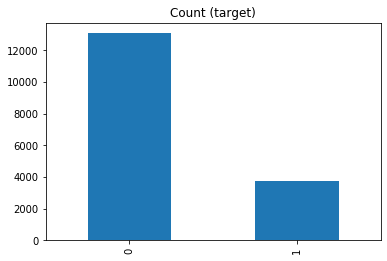

In [6]:
plt.figure
y_train_ud.value_counts().plot(kind='bar', title='Count (target)')

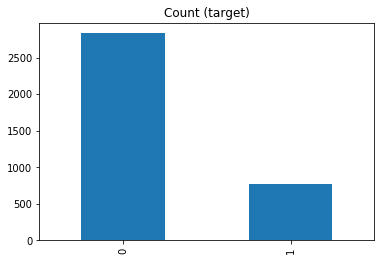

In [7]:
y_val_ud.value_counts().plot(kind='bar', title='Count (target)')

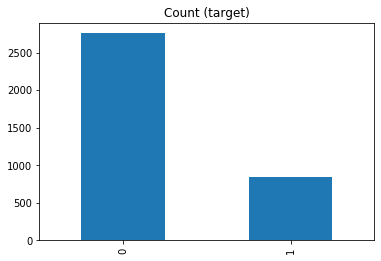

In [8]:
y_test_ud.value_counts().plot(kind='bar', title='Count (target)')

In [9]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve


In [10]:
# Use Balanced Dataset
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_train_ud,y_train_ud=ros.fit_resample(X_train_ud,y_train_ud)
X_val_ud,y_val_ud=ros.fit_resample(X_val_ud,y_val_ud)

Using TensorFlow backend.


In [11]:
y_train.shape


(16800,)

In [12]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
D_val = xgb.DMatrix(X_val, label=y_val)


param = {    'eta': 0.1, 
    'max_depth': 5000,  
    'objective': 'multi:softprob',  
    'n_estimators':100,
    'num_class': 3,
    'colsample_bytree':0.5,
    'subsample':0.5,
    'learning_rate':0.01,
    'min_child_weight':10,
    'num_parallel_tree':5,
    'lambda':6,
        'alpha':2

}
steps =100

model = xgb.train(param, D_train, steps)



preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Train_Accuracy = {}".format(accuracy_score(y_train, np.asarray([np.argmax(line) for line in model.predict(D_train)]))))
print("Val_Accuracy = {}".format(accuracy_score(y_val, np.asarray([np.argmax(line) for line in model.predict(D_val)]))))
print("Test_Accuracy = {}".format(accuracy_score(y_test, best_preds)))

print('\nFor train Data\n')
print(classification_report(y_test,best_preds))
print ('\n')
print(confusion_matrix(y_test,best_preds))

C:\Users\Udith\anaconda_\envs\opencv\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Precision = 0.7635038785240322
Recall = 0.6487226104495839
Train_Accuracy = 0.8238690476190477
Val_Accuracy = 0.8261111111111111
Test_Accuracy = 0.8119444444444445

For train Data

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2758
           1       0.70      0.34      0.46       842

    accuracy                           0.81      3600
   macro avg       0.76      0.65      0.67      3600
weighted avg       0.80      0.81      0.79      3600



[[2635  123]
 [ 554  288]]


In [21]:
### for unblanced (Have done it for unbalanced data also)
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 2,  
    'objective': 'multi:softprob',  
    'n_estimators':1200,
    'num_class': 3,
    'colsample_bytree':0.7,
    'subsample':0.800,
    'learning_rate':0.3,
    'gamma':0,
    'min_child_weight':12,
    'num_parallel_tree':8
}
steps =20

model = xgb.train(param, D_train, steps)

import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve

print(classification_report(y_test,best_preds))
print ('\n')
print(confusion_matrix(y_test,best_preds))

Precision = 0.7627802444019849
Recall = 0.6564108901937615
Accuracy = 0.8136111111111111
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2758
           1       0.70      0.36      0.48       842

    accuracy                           0.81      3600
   macro avg       0.76      0.66      0.68      3600
weighted avg       0.80      0.81      0.79      3600



[[2625  133]
 [ 538  304]]


In [22]:
D_pred = xgb.DMatrix(X_pred)

In [23]:
preds = np.asarray([np.argmax(line) for line in model.predict(D_pred)])
%store preds #this preds are used for sumbitting

Stored 'preds' (ndarray)
